In [3]:
!unzip "Đề 1.zip"

Archive:  Đề 1.zip
Đề 1/:  mismatching "local" filename (─Рс╗Б 1/),
         continuing with "central" filename version
   creating: Đề 1/
Đề 1/cat.jpg:  mismatching "local" filename (─Рс╗Б 1/cat.jpg),
         continuing with "central" filename version
  inflating: Đề 1/cat.jpg         
Đề 1/dog.jpg:  mismatching "local" filename (─Рс╗Б 1/dog.jpg),
         continuing with "central" filename version
  inflating: Đề 1/dog.jpg         
Đề 1/test.csv:  mismatching "local" filename (─Рс╗Б 1/test.csv),
         continuing with "central" filename version
  inflating: Đề 1/test.csv        
Đề 1/train.csv:  mismatching "local" filename (─Рс╗Б 1/train.csv),
         continuing with "central" filename version
  inflating: Đề 1/train.csv       


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/AI_Advanced_CK/NLP/3_Paragraph_classification')

## Dataset

In [4]:
import numpy as np

In [5]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
train_df = pd.read_csv('Đề 1/train.csv')

# Display the first few rows of the DataFrame
print(train_df.head())

   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


In [7]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
test_df = pd.read_csv('Đề 1/test.csv')

# Display the first few rows of the DataFrame
print(test_df.head())

   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  


In [8]:
# Concatenate the DataFrames
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  


In [12]:
sentences = combined_df['Description'].values
labels = combined_df['Class Index'].values
print(len(sentences))
print(len(labels))

15200
15200


In [13]:
print(len(sentences))
print(len(labels))
print(sentences[0])
print(labels[0])

15200
15200
Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
3


In [14]:
# Lấy danh sách các nhãn duy nhất
unique_labels = list(set(labels))

In [15]:
print(unique_labels)
print(len(unique_labels))

[1, 2, 3, 4]
4


In [16]:
label_dict = {}
for i, label in enumerate(unique_labels):
    label_dict[i] = label

In [17]:
print(label_dict)

{0: 1, 1: 2, 2: 3, 3: 4}


In [18]:
inverted_label_dict = {}
for key, value in label_dict.items():
    inverted_label_dict[value] = key

In [19]:
print(inverted_label_dict)

{1: 0, 2: 1, 3: 2, 4: 3}


In [20]:
labels = [inverted_label_dict[label] for label in labels]

In [21]:
# remove các dòng có độ dài hơn 5000
filtered_sentences = []
filtered_labels = []

# Lọc các câu và nhãn tương ứng
for sen, label in zip(sentences, labels):
    if len(sen.split()) <= 5000:
        filtered_sentences.append(sen)
        filtered_labels.append(label)

# Kiểm tra số lượng câu và nhãn trước và sau khi lọc
print("Number of sentences before filtering:", len(sentences))
print("Number of sentences after filtering:", len(filtered_sentences))
print("Number of labels before filtering:", len(labels))
print("Number of labels after filtering:", len(filtered_labels))

Number of sentences before filtering: 15200
Number of sentences after filtering: 15200
Number of labels before filtering: 15200
Number of labels after filtering: 15200


In [22]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo tỷ lệ 70:30
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    filtered_sentences, filtered_labels, test_size=0.3, random_state=42)

# In độ dài của các tập để kiểm tra
print("Training sentences:", len(train_sentences))
print("Test sentences:", len(test_sentences))
print("Training labels:", len(train_labels))
print("Test labels:", len(test_labels))

# In một số ví dụ từ các tập huấn luyện và kiểm tra
print("First training sentence:", train_sentences[0])
print("First training label:", train_labels[0])
print("First test sentence:", test_sentences[0])
print("First test label:", test_labels[0])

Training sentences: 10640
Test sentences: 4560
Training labels: 10640
Test labels: 4560
First training sentence: AFP - The hit US television show  quot;24 quot; is going from the small screen to the smaller after 20th Century Fox and Vodaphone struck a groundbreaking deal to distribute the drama on mobile telephones.
First training label: 3
First test sentence: The last time Tony La Russa managed a postseason series against the Dodgers, his club was an Oakland juggernaut that dominated the regular season with 104 victories.
First test label: 1


In [23]:
print(type(test_sentences))

<class 'list'>


In [24]:
print(len(train_sentences))
print(len(train_labels))

10640
10640


In [25]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [27]:
num_labels = len(label_dict)

In [28]:
from tensorflow.keras.utils import to_categorical

# Mã hóa one-hot cho các nhãn đã được chuyển đổi
train_labels_one_hot = to_categorical(train_labels, num_classes=num_labels)
test_labels_one_hot = to_categorical(test_labels, num_classes=num_labels)

In [29]:
train_labels_one_hot[0]

array([0., 0., 0., 1.], dtype=float32)

## Parameters

In [53]:
vocab_size = 10000
embedding = 64
max_length = 256
embedding_dim = 128  # Kích thước vector nhúng
num_labels = len(label_dict)  # Số lượng nhãn

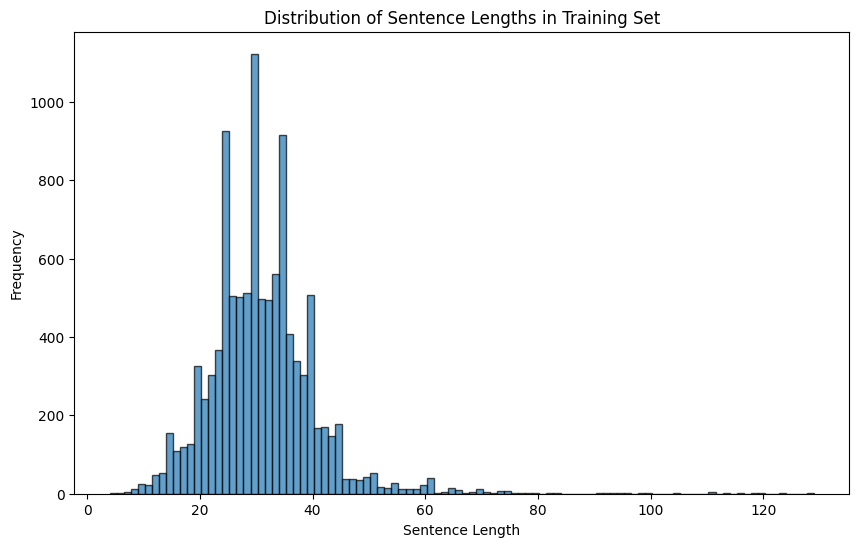

In [31]:
import matplotlib.pyplot as plt

# Giả sử train_sentences đã được định nghĩa và chia trước đó

# Tính độ dài của từng câu trong train_sentences
sentence_lengths = [len(sentence.split()) for sentence in train_sentences]

# Vẽ biểu đồ phân phối độ dài các câu
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=100, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentence Lengths in Training Set')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

## Tokenizer

In [32]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Thử nghiệm với các giá trị khác nhau của vocab_size
# vocab_sizes = [5000, 10000, 20000]

# for vocab_size in vocab_sizes:
#     tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
#     tokenizer.fit_on_texts(train_sentences)

#     # Chuyển đổi các câu thành các chuỗi số
#     train_sequences = tokenizer.texts_to_sequences(train_sentences)

#     # Đệm các chuỗi để có độ dài bằng nhau
#     padded_sequences = pad_sequences(train_sequences, maxlen=100, padding='post')

#     print(f"Vocabulary Size: {vocab_size}")
#     print(f"Example of padded sequences: {padded_sequences[:2]}")
#     print(f"Number of unique tokens: {len(tokenizer.word_index)}")
#     print("-" * 50)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer (num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts (train_sentences + test_sentences + ['Nguyễn Văn Hoàng Phúc'])

In [38]:
train_sentences_seq = tokenizer.texts_to_sequences(train_sentences)
padded_train_sentences = pad_sequences (train_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [39]:
word_index = tokenizer.word_index
len(tokenizer.word_index)

20589

In [40]:
print(word_index['romance'])

14138


In [42]:
# Từ index lấy ra word
reverse_word_index = {index: word for word, index in word_index.items()}
print(reverse_word_index[14138])

romance


In [44]:
test_sentences_seq = tokenizer.texts_to_sequences (test_sentences)
padded_test_sentences = pad_sequences(test_sentences_seq, maxlen=max_length, truncating='post', padding='post')

In [43]:
print(len(test_sentences[0]))
print(test_sentences[0])

165
The last time Tony La Russa managed a postseason series against the Dodgers, his club was an Oakland juggernaut that dominated the regular season with 104 victories.


In [45]:
padded_test_sentences

array([[   2,   61,   81, ...,    0,    0,    0],
       [ 162,  103, 2407, ...,    0,    0,    0],
       [   2, 7193,    1, ...,    0,    0,    0],
       ...,
       [   2,   84,  147, ...,    0,    0,    0],
       [   2, 2649,   87, ...,    0,    0,    0],
       [ 123,  122,    5, ...,    0,    0,    0]], dtype=int32)

In [46]:
padded_test_sentences.shape

(4560, 256)

In [47]:
print(len(padded_test_sentences[0]))

256


## Model using BiLSTM

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Create BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, 128, input_length=max_length))
bilstm_model.add(Bidirectional(LSTM(256)))

bilstm_model.add(Dense(64, activation='relu'))
bilstm_model.add(Dense(num_labels, activation='softmax'))

bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 128)          1280000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               788480    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2101572 (8.02 MB)
Trainable params: 2101572 (8.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


embedding: (256,10000) * (10000, 128) = (256, 128)
- biLstm: units = 512
RNN_params = (units*units + units*input_dim + units)
LSTM_params = 4*RNN_params
BiLSTM_params = 2*LSTM_params

## Training

In [55]:
padded_train_sentences.shape

(10640, 256)

In [56]:
train_labels_one_hot.shape

(10640, 4)

In [57]:
print(padded_train_sentences.shape)
print(padded_test_sentences.shape)
print(train_labels_one_hot.shape)
print(test_labels_one_hot.shape)

(10640, 256)
(4560, 256)
(10640, 4)
(4560, 4)


In [58]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Phuc_Save_Model/BiLSTM_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = bilstm_model.fit(padded_train_sentences, train_labels_one_hot, epochs=10, batch_size=128,
                            validation_data=(padded_test_sentences, test_labels_one_hot),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
84/84 [==============================] - ETA: 0s - loss: 0.9933 - accuracy: 0.5844
Epoch 1: val_loss improved from inf to 0.49277, saving model to ./Phuc_Save_Model/BiLSTM_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 22s 178ms/step - loss: 0.9933 - accuracy: 0.5844 - val_loss: 0.4928 - val_accuracy: 0.8303
Epoch 2/10
84/84 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8993
Epoch 2: val_loss improved from 0.49277 to 0.25636, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
84/84 [==============================] - 9s 103ms/step - loss: 0.3828 - accuracy: 0.8993 - val_loss: 0.2564 - val_accuracy: 0.9224
Epoch 3/10
84/84 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 0.9765
Epoch 3: val_loss improved from 0.25636 to 0.20781, saving model to ./Phuc_Save_Model/BiLSTM_model.h5
84/84 [==============================] - 10s 116ms/step - loss: 0.0854 - accuracy: 0.9765 - val_loss: 0.2078 - val_accuracy: 0.9399
Epoch 4/10
84/84 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9920
Epoch 4: val_loss did not improve from 0.20781
84/84 [==============================] - 8s 98ms/step - loss: 0.0358 - a

In [59]:
!nvidia-smi

Mon May 27 03:10:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0              70W /  70W |   1281MiB / 15360MiB |     89%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

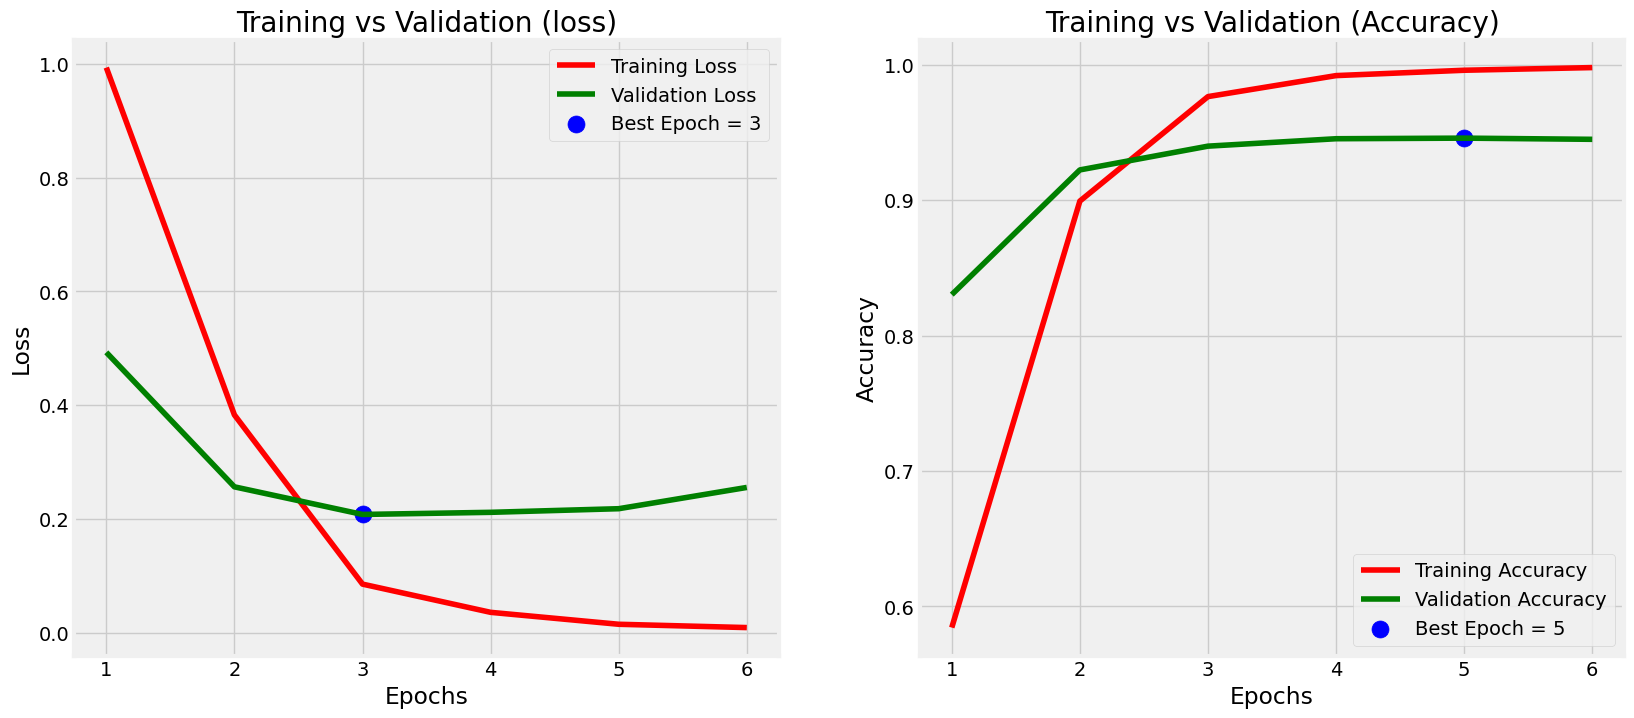

In [60]:
train_acc = H.history['accuracy']
train_loss = H.history['loss']

val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()